## Smoking model

In [1]:
%load_ext autoreload
%autoreload 2
from model_vec import DynamicModel 

import numpy as np
import matplotlib.pyplot as plt

## Plot model for different parameters

0
0.1
0.5


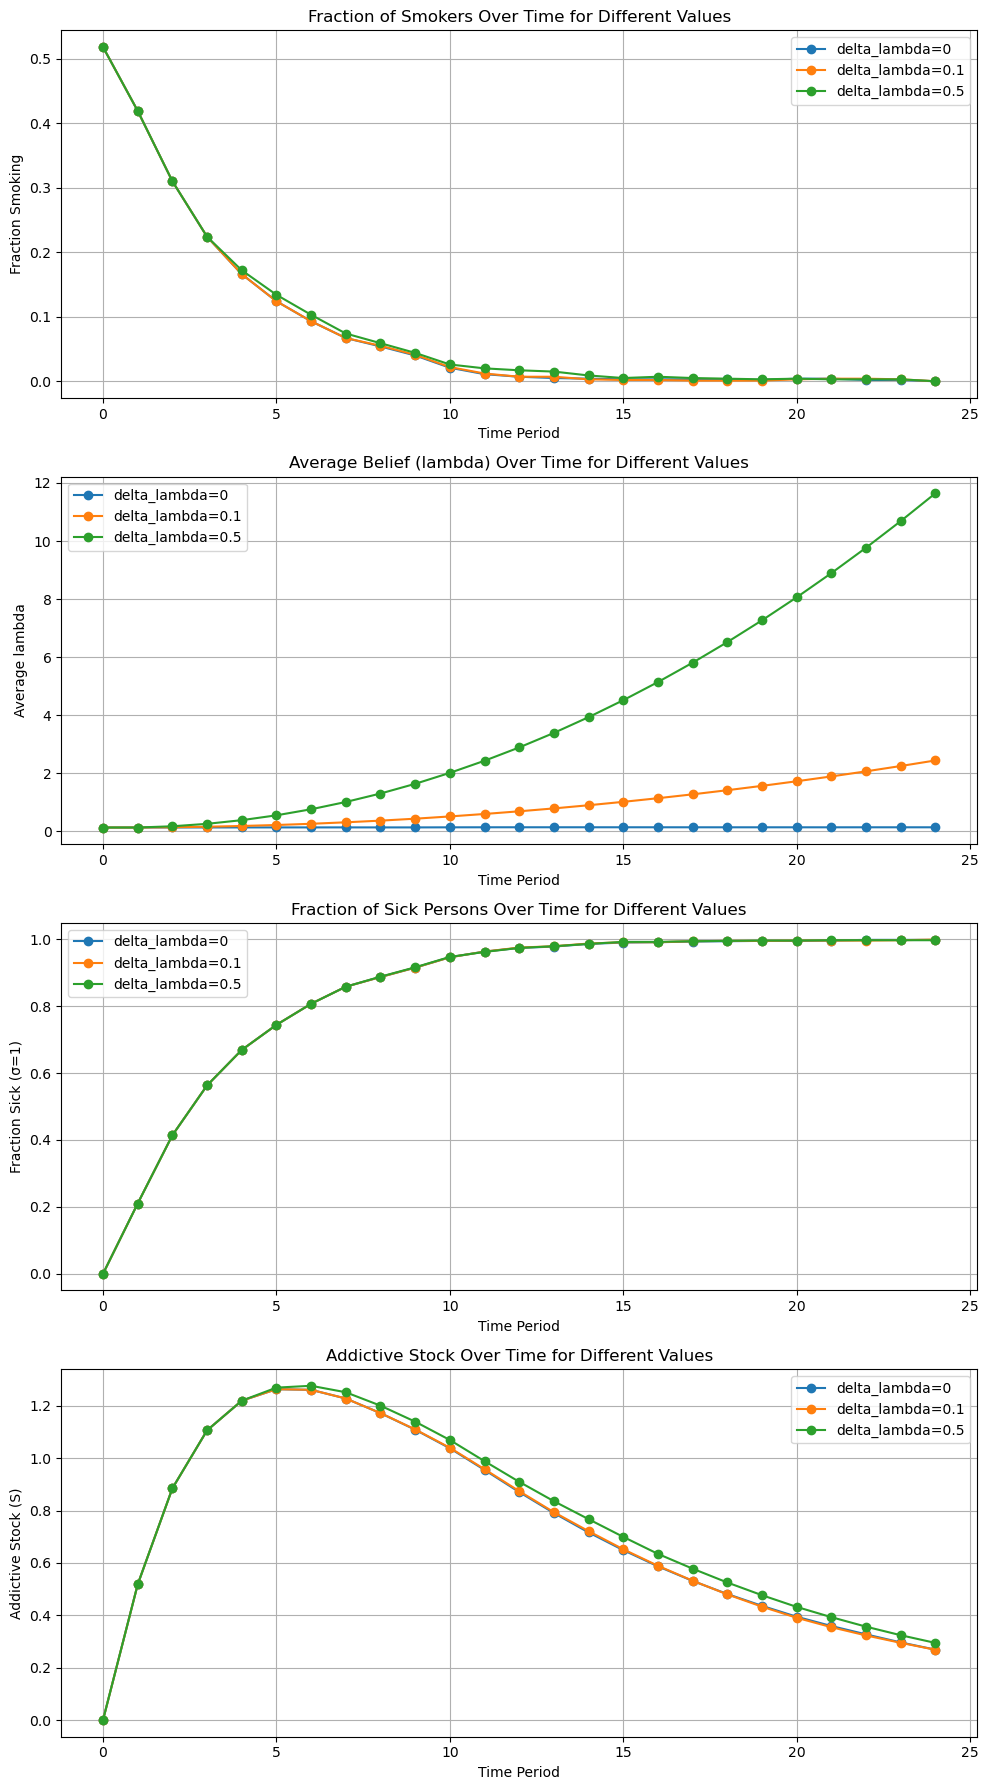

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# List of different values for 'delta_lambda' to loop over
delta_lambdas = [0, 0.1, 0.5]

# Set up the figure for the three plots in a single window
fig, axes = plt.subplots(4, 1, figsize=(10, 18))

# Loop over different values of delta_lambda
for val in delta_lambdas:
    # Initialize the model with a specific delta_lambda value
    model = DynamicModel(T=25, delta_lambda=val, 
                         lambda_range=10, 
                         delta_S=0.1, 
                         y=100, 
                         p=1, 
                         a_bsigma=-0.8,
                         P=1000)
    
    # Solve the model using backward induction
    model.backward_induction_vectorized()
    
    # Simulate and get results
    S_sim, sigma_sim, lambda_sim, b_sim = model.simulate_and_plot(plot=0)
    
    # Compute statistics
    fraction_smoking = np.mean(b_sim, axis=1)
    avg_lambda = np.mean(lambda_sim, axis=1)
    fraction_sick = np.mean(sigma_sim, axis=1)
    addictive_stock = np.mean(S_sim, axis=1)
    
    # Plot fraction of smokers for this value of delta_lambda
    axes[0].plot(range(model.T), fraction_smoking, marker='o', label=f'delta_lambda={val}')
    
    # Plot average lambda over time for this value of delta_lambda
    axes[1].plot(range(model.T), avg_lambda, marker='o', label=f'delta_lambda={val}')
    
    # Plot fraction sick over time for this value of delta_lambda
    axes[2].plot(range(model.T), fraction_sick, marker='o', label=f'delta_lambda={val}')

    # 
    axes[3].plot(range(model.T), addictive_stock, marker='o', label=f'delta_lambda={val}')

    print(val)

# Add labels, title, and grid for the first plot (fraction smoking)
axes[0].set_xlabel('Time Period')
axes[0].set_ylabel('Fraction Smoking')
axes[0].set_title('Fraction of Smokers Over Time for Different Values')
axes[0].legend()
axes[0].grid(True)

# Add labels, title, and grid for the second plot (average lambda)
axes[1].set_xlabel('Time Period')
axes[1].set_ylabel('Average lambda')
axes[1].set_title('Average Belief (lambda) Over Time for Different Values')
axes[1].legend()
axes[1].grid(True)

# Add labels, title, and grid for the third plot (fraction sick)
axes[2].set_xlabel('Time Period')
axes[2].set_ylabel('Fraction Sick (σ=1)')
axes[2].set_title('Fraction of Sick Persons Over Time for Different Values')
axes[2].legend()
axes[2].grid(True)

# Add labels, title, and grid for the fourth plot (addictive stock)
axes[3].set_xlabel('Time Period')
axes[3].set_ylabel('Addictive Stock (S)')
axes[3].set_title('Addictive Stock Over Time for Different Values')
axes[3].legend()
axes[3].grid(True)

# Show the plot
plt.tight_layout()
plt.show()


## Compare loop-based and vectorized methods

In [3]:
# Initialize and solve using loop-based method
model = DynamicModel()
model.backward_induction()
S_sim_loop, sigma_sim_loop, lambda_sim_loop, b_sim_loop = model.simulate_and_plot(plot=0)


In [6]:
# Now solve using vectorized method
model = DynamicModel()
model.backward_induction_vectorized()
S_sim_vec, sigma_sim_vec, lambda_sim_vec, b_sim_vec = model.simulate_and_plot(plot=0)

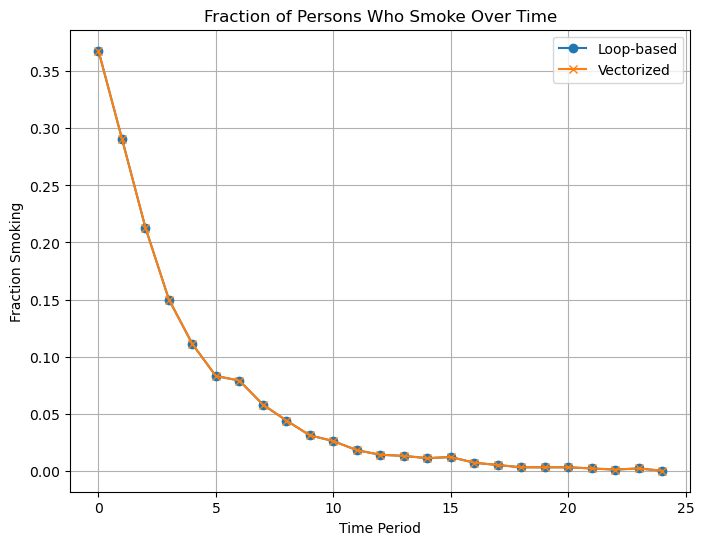

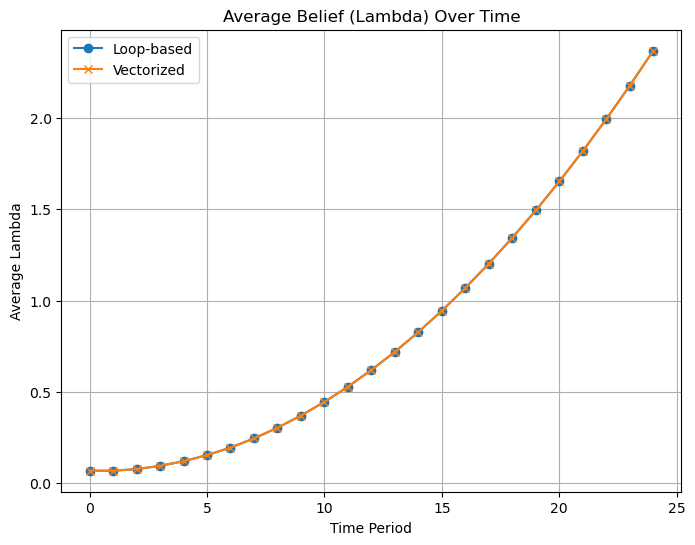

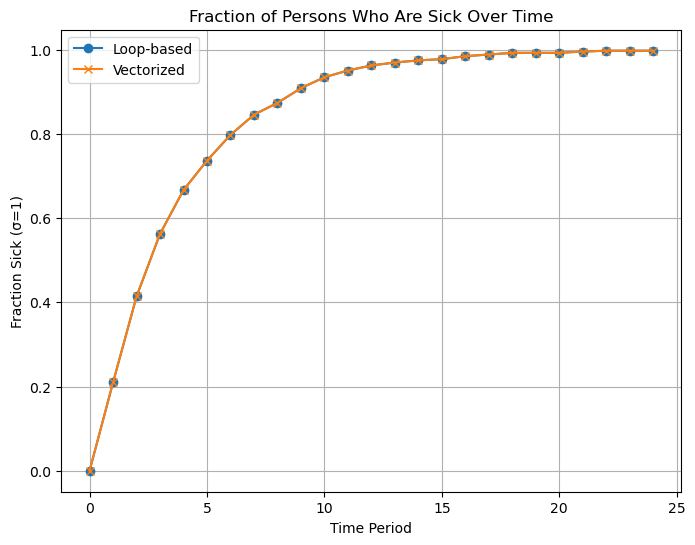

In [7]:
# ---- Plot comparison ----
T = model.T
time = np.arange(T)

# 1. Smoking fraction
plt.figure(figsize=(8, 6))
plt.plot(time, np.mean(b_sim_loop, axis=1), label='Loop-based', marker='o')
plt.plot(time, np.mean(b_sim_vec, axis=1), label='Vectorized', marker='x')
plt.xlabel('Time Period')
plt.ylabel('Fraction Smoking')
plt.title('Fraction of Persons Who Smoke Over Time')
plt.legend()
plt.grid(True)
plt.show()

# 2. Average lambda
plt.figure(figsize=(8, 6))
plt.plot(time, np.mean(lambda_sim_loop, axis=1), label='Loop-based', marker='o')
plt.plot(time, np.mean(lambda_sim_vec, axis=1), label='Vectorized', marker='x')
plt.xlabel('Time Period')
plt.ylabel('Average Lambda')
plt.title('Average Belief (Lambda) Over Time')
plt.legend()
plt.grid(True)
plt.show()

# 3. Fraction sick
plt.figure(figsize=(8, 6))
plt.plot(time, np.mean(sigma_sim_loop, axis=1), label='Loop-based', marker='o')
plt.plot(time, np.mean(sigma_sim_vec, axis=1), label='Vectorized', marker='x')
plt.xlabel('Time Period')
plt.ylabel('Fraction Sick (σ=1)')
plt.title('Fraction of Persons Who Are Sick Over Time')
plt.legend()
plt.grid(True)
plt.show()
